In [ ]:
#objective - Analyze the trends, popularity, and characteristics of Korean dramas over the years based on various factors such as country, type, total episodes, content rating, and rank.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('korean_drama.csv')

In [70]:
df = data.copy()

## EDA

In [4]:
df.describe() # descriptive statistics

,year,tot_eps,duration,rank,pop
count,1752.000000,1752.000000,1728.000000,1752.000000,1752.000000
mean,2019.006849,18.996005,2149.791667,22247.869292,22153.746575
std,2.317455,25.618394,1532.133619,27688.839480,37776.993814
min,2015.000000,1.000000,60.000000,9.000000,1.000000
25%,2017.000000,8.000000,720.000000,2441.500000,915.750000
50%,2019.000000,12.000000,1800.000000,6265.500000,3698.500000
75%,2021.000000,16.000000,3600.000000,49204.500000,12086.250000
max,2023.000000,150.000000,9180.000000,99999.000000,99999.000000


In [5]:
df.head()

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [6]:
df.tail()

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
1747,e8c09f0f7d0d4b75a4642eb06d76d811,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,1e7f7f2fa45d4240b8bb585ca13040f0,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,142a09741fdd4daa878d6ae007201e43,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,9170c31a02014b56bb4cec2105086f00,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289
1751,c19353bdbc7a43ae98b27db202e7c908,Crow Building,2015,NaN,NaN,South Korea,Drama,11,NaN,2015,2015,NaN,NaN,15+ - Teens 15 or older,"In this wacky, meta workplace sitcom, a food d...",99999,99999


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kdrama_id     1752 non-null   object 
 1   drama_name    1752 non-null   object 
 2   year          1752 non-null   int64  
 3   director      1036 non-null   object 
 4   screenwriter  959 non-null    object 
 5   country       1752 non-null   object 
 6   type          1752 non-null   object 
 7   tot_eps       1752 non-null   int64  
 8   duration      1728 non-null   float64
 9   start_dt      1752 non-null   object 
 10  end_dt        1752 non-null   object 
 11  aired_on      1520 non-null   object 
 12  org_net       1344 non-null   object 
 13  content_rt    1752 non-null   object 
 14  synopsis      1584 non-null   object 
 15  rank          1752 non-null   int64  
 16  pop           1752 non-null   int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 232.8+ KB


In [8]:
df.isna().sum()

kdrama_id         0
drama_name        0
year              0
director        716
screenwriter    793
country           0
type              0
tot_eps           0
duration         24
start_dt          0
end_dt            0
aired_on        232
org_net         408
content_rt        0
synopsis        168
rank              0
pop               0
dtype: int64

In [13]:
df = df.fillna(0)

In [14]:
df['director'].isna().sum()

0

In [15]:
df.isna().sum()

kdrama_id       0
drama_name      0
year            0
director        0
screenwriter    0
country         0
type            0
tot_eps         0
duration        0
start_dt        0
end_dt          0
aired_on        0
org_net         0
content_rt      0
synopsis        0
rank            0
pop             0
dtype: int64

In [16]:
df.head()

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],0,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,0,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,0,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,0,0,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,0,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [17]:
df.columns

Index(['kdrama_id', 'drama_name', 'year', 'director', 'screenwriter',
       'country', 'type', 'tot_eps', 'duration', 'start_dt', 'end_dt',
       'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop'],
      dtype='object')

In [18]:
drama_sorted= df.sort_values('duration', ascending= False)
drama10 = drama_sorted.iloc[0:10]
drama10

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
1591,b6e803ce495e4b3abcd8a673bc839f49,Time of Miracle: Loss Time,2016,0,0,South Korea,Drama,2,9180.0,2016-02-10,2016-02-17,Wednesday,KBS1,Not Yet Rated,A comedy about people who are facing sudden de...,44251,99999
316,afd62f40453244bb850a6b4374e80811,Cheongchunhyang Jeon,2021,0,0,South Korea,Drama,1,7200.0,"Dec 20, 2021","Dec 20, 2021",0,0,G - All Ages,“Chung Chun Hyang Jeon” will tell the story of...,47143,11722
331,e8df05a7221b4a119e67460d4fea756f,Midnight Thriller,2021,"['Yoo Young Sun', 'Park Sun Jae', 'Lim Kyeong ...",0,South Korea,Drama,3,6300.0,"Dec 9, 2021","Dec 9, 2021",Thursday,Genie TV,Not Yet Rated,An anthology about 'disappearance'.> Story 1 :...,42267,15980
453,179a8de0480e4349815de69072857ccd,Hospital Playlist Season 2,2021,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,6000.0,2021-06-17,2021-09-16,Thursday,Netflix tvN,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,161
1627,f37f659336624834ad98e1ebf8866d1f,Reply 1988,2015,"['Shin Won Ho', 'Yoo Hak Chan']",['Lee Woo Jung'],South Korea,Drama,20,5700.0,2015-11-06,2016-01-16,"Friday, Saturday",tvN,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...",26,41
1265,022b939ec9a9499789dbc3f6980490dc,Prison Playbook,2017,['Shin Won Ho'],"['Jung Bo Hoon', 'Lee Woo Jung']",South Korea,Drama,16,5520.0,2017-11-22,2018-01-18,"Wednesday, Thursday",Netflix tvN,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...",46,93
321,6275f94b7ffe42a09fca2f4dc5312949,Snowdrop,2021,['Jo Hyun Taek'],['Yoo Hyun Mi'],South Korea,Drama,16,5400.0,2021-12-18,2022-01-30,"Saturday, Sunday",jTBC,15+ - Teens 15 or older,"In 1987, a bloody man jumps into a women’s uni...",628,144
747,f56738c9f0c345029991e7e93e239f6a,Hospital Playlist,2020,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,5400.0,2020-03-12,2020-05-28,Thursday,Netflix tvN,15+ - Teens 15 or older,The stories of people going through their days...,23,49
89,f7a6fc58e1bd4fd098c6f39af8352538,Red Balloon,2022,['Jin Hyung Wook'],['Moon Young Nam'],South Korea,Drama,20,5100.0,2022-12-17,2023-02-26,"Saturday, Sunday",TV Chosun,15+ - Teens 15 or older,A story of four people attempting to quench th...,6370,3648
616,0305a24952e242d3b56931b7f334d9ec,Start-Up,2020,['Oh Choong Hwan'],['Park Hye Ryun'],South Korea,Drama,16,5100.0,2020-10-17,2020-12-06,"Saturday, Sunday",Netflix tvN,15+ - Teens 15 or older,Set in one of the world’s most advanced tech s...,1724,50


/tmp/ipykernel_17895/317981577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= drama10, x='duration', y='drama_name', palette= 'magma')


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

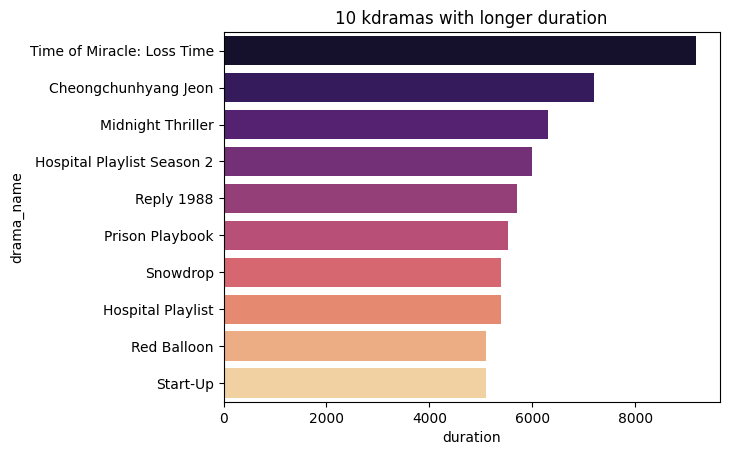

In [20]:
# top 10 dramas
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data= drama10, x='duration', y='drama_name', palette= 'magma')
plt.title('10 kdramas with longer duration')
plt.ylable('name')
plt.xlable('duration')
plt.show()

In [23]:
# top 10 kdramas with highest rank

sorted_rank = df.sort_values('rank', ascending = False)
top_ranked = sorted_rank.iloc[0:10]
top_ranked


,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
1751,c19353bdbc7a43ae98b27db202e7c908,Crow Building,2015,0,0,South Korea,Drama,11,0.0,2015,2015,0,0,15+ - Teens 15 or older,"In this wacky, meta workplace sitcom, a food d...",99999,99999
1376,2027a2b550334f7da7f1e986042aa28b,"Bamboo: 9pm, Please Tell My Story",2017,0,0,South Korea,Drama,10,360.0,2017-04-30,2018-03-19,0,0,Not Yet Rated,0,99999,99999
1656,584aa931031a4fc08993141a9d101dc3,Mobilize! K-Cop,2015,0,0,South Korea,Drama,26,780.0,2015-09-07,2015-11-24,"Monday, Tuesday",0,Not Yet Rated,"By chance, two incumbent policemen rescued Pri...",99999,99999
1361,fa4d42d8b25a42e0b962fe4e258544b5,10000 Ways to Become a Couple,2017,0,0,South Korea,Drama,5,600.0,2017-05-31,2018-03-07,Wednesday,0,Not Yet Rated,‘Are we doing alright?’ From the first fight t...,99999,99999
1180,26bcf9dd5b8a4580ace3b927aba68e50,"City's Night, Star",2018,0,0,South Korea,Drama,8,780.0,2018-04-07,2018-05-15,0,0,G - All Ages,"This web drama is about Ahn Mori, Park Gyu Yeo...",99999,99999
1371,2b6e4e2db07f46218d57d00dad9b4c02,Happy Talk,2017,0,0,South Korea,Drama,6,300.0,2017-05-18,2017-06-02,Thursday,Naver TV Cast,Not Yet Rated,0,99999,99999
1179,abbaf76466d44e678fd71036dc5230ca,Sweaty House,2018,0,0,South Korea,Drama,8,300.0,2018-04-12,2018-06-25,0,0,Not Yet Rated,0,99999,99999
485,ad10a2d50c004f389a281ffe672a046c,Global Travel Agency Gaboiso,2021,0,0,South Korea,Drama,5,600.0,2021-04-27,2021-05-25,0,0,Not Yet Rated,"Confidently established, for those who were cr...",99999,99999
755,35831a99cf554fd6941e748cc9cc62db,One Fun Girl,2020,0,0,South Korea,Drama,10,300.0,2020-02-18,2020-04-28,Tuesday,0,Not Yet Rated,One Fun Girl goes around trying to stop differ...,99999,99999
757,ea2242d13ef44d548bef7a2652ff38ae,Sungkyunkwan Romance,2020,0,0,South Korea,Drama,3,540.0,"Feb 14, 2020","Feb 14, 2020",0,0,Not Yet Rated,A web drama about students at Sungkyunkwan Uni...,99999,99999


/tmp/ipykernel_17895/2058782528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_ranked, x='rank', y='drama_name', palette='viridis')


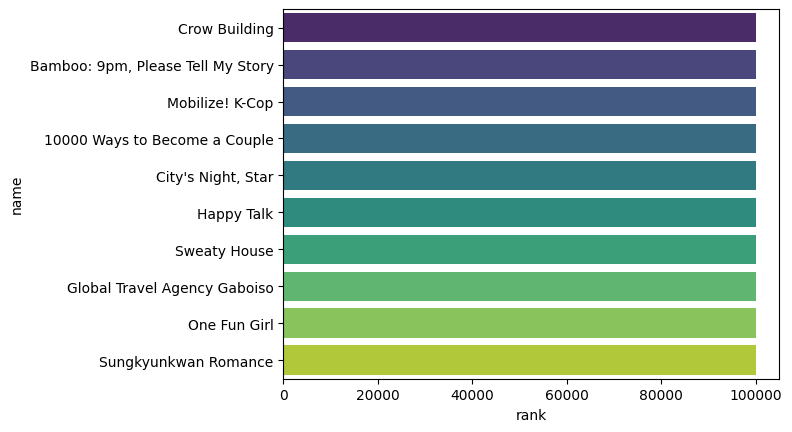

In [24]:
sns.barplot(data = top_ranked, x='rank', y='drama_name', palette='viridis')
plt.title =('10 dramas with top ranked')
plt.ylabel('name')
plt.xlabel('rank')
plt.show()

In [25]:
df.dtypes

kdrama_id        object
drama_name       object
year              int64
director         object
screenwriter     object
country          object
type             object
tot_eps           int64
duration        float64
start_dt         object
end_dt           object
aired_on         object
org_net          object
content_rt       object
synopsis         object
rank              int64
pop               int64
dtype: object

In [27]:
df.duplicated().sum()

0

In [31]:
# data selection and indexing
df_2020 = df[df['year'] == 2020] # dramas released in 2020
df_park_director = df[df['director'] == 'Park Chan-wook'] # dramas by park cha wook
df_2020 


,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
162,8cb84ad3d0064c14954b539ae4090ee9,Once Again,2020,['Lee Jae Sang'],['Yang Hee Seung'],South Korea,Drama,100,2100.0,2020-03-28,2020-09-13,"Saturday, Sunday",KBS2,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...",351,999
564,9e8095dd79b2452b978c617e091ad4df,The Man of My Life,2020,0,0,South Korea,Drama,6,960.0,2020-12-30,2021-02-03,Wednesday,Naver TV Cast,15+ - Teens 15 or older,"Jin Nam Joo gets dumped by her boyfriend, whom...",6966,9790
565,247df928bf364b9a99f1563d8f24216c,Color Rush,2020,0,0,South Korea,Drama,8,900.0,2020-12-30,2021-01-21,"Wednesday, Thursday",LINE TV Viki ViuTV,15+ - Teens 15 or older,Monochromatic people (known as 'Mono's) live i...,4672,184
566,8c3ab0366564445da7ca7d3c4e3e3c4a,A Love So Beautiful,2020,0,['Jang Yoo Yeon'],South Korea,Drama,24,1200.0,2020-12-28,2021-02-20,"Monday, Thursday, Saturday",Daum Kakao TV Netflix,13+ - Teens 13 or older,Cha Heon is a student at Chun Ji High School w...,3468,340
567,8f7aa83acae34ef39a70c7c4ab4dbf7d,Star With a Secret,2020,0,0,South Korea,Drama,5,900.0,2020-12-27,2020-12-31,"Monday, Tuesday, Wednesday, Thursday, Sunday",0,Not Yet Rated,A made -for - web drama about an unusual roman...,8754,4650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,8a720bdcf2234bda87d53eb50736f699,Winter Vacation,2020,0,['Kim Hyo Jin'],South Korea,Drama,6,660.0,2020-01-10,2020-02-14,Friday,vLive,15+ - Teens 15 or older,It is a teen romance web drama that tells the ...,58926,13663
777,75b8778871df4fbc830652abeb13fa89,A Twist Girl,2020,0,0,South Korea,Drama,3,600.0,2020-01-09,2020-02-08,0,0,Not Yet Rated,The first-class girl in the whole school and a...,52785,99999
778,79c4732493654aea9f181811e289adc4,Dr. Romantic Season 2,2020,"['Yoo In Shik', 'Lee Gil Bok']",['Kang Eun Kyung'],South Korea,Drama,16,4200.0,2020-01-06,2020-02-25,"Monday, Tuesday",SBS,15+ - Teens 15 or older,"A “real doctor” story set in a small, humble h...",185,168
779,544c51af0c98459bb4e3ef922b56fffd,Lover of the Palace,2020,0,0,South Korea,Drama,10,600.0,2020-01-03,2020-01-17,0,0,Not Yet Rated,"Working as a tour guide at Deoksugung Palace, ...",8535,8135


In [32]:
df_park_director 

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop


In [33]:
df.set_index('kdrama_id', inplace = True) # index set

In [34]:
df.head(3)

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
kdrama_id,,,,,,,,,,,,,,,,
661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],0,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,0,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,0,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915


In [35]:
df.reset_index(inplace = True) # reset index

In [41]:
# group by aggregation
#Group the data by year and type, and calculate the average popularity
df_grouped = df.groupby(['year', 'type'])['pop'].mean()
df_grouped.reset_index()

,year,type,pop
0,2015,Drama,11735.895833
1,2016,Drama,21716.005814
2,2017,Drama,25174.618812
3,2018,Drama,24818.617925
4,2019,Drama,24345.816327
5,2020,Drama,23274.225806
6,2021,Drama,26427.396887
7,2022,Drama,20625.771300
8,2023,Drama,7935.025000


In [49]:
# Aggregate the total number of episodes and average content rating by country.
df_country = df.groupby('country').agg({'tot_eps':'sum','rank':'mean'})
df_country

,tot_eps,rank
country,,
South Korea,33281,22247.869292


In [44]:
df.dtypes

kdrama_id        object
drama_name       object
year              int64
director         object
screenwriter     object
country          object
type             object
tot_eps           int64
duration        float64
start_dt         object
end_dt           object
aired_on         object
org_net          object
content_rt       object
synopsis         object
rank              int64
pop               int64
dtype: object

In [51]:
# Group the data by director and calculate the sum of popularity and average rank.
df_director = df.groupby('director').agg({'pop':'sum', 'rank':'mean'})
df_director

,pop,rank
director,,
0,33804883,41164.106145
"['Ahn Gil Ho', 'Yoo In Shik']",2253,2519.000000
['Ahn Gil Ho'],12472,7535.888889
['Ahn Ji Hee'],763,5998.000000
"['Ahn Ji Sook', 'Nam Sung Woo']",278,1367.000000
...,...,...
"['Yoon Sung Ho', 'Park Dong Hoon']",4729,7959.000000
"['Yoon Sung Ho', 'Park Hyun Jin']",7532,56192.000000
['Yoon Sung Ho'],810,4532.000000


In [53]:
# reshaping data
#Create a pivot table to analyze the average rank by year and country
df_pivot = df.pivot_table(values='rank', index='year', columns='country', aggfunc='mean')
df_pivot

country,South Korea
year,
2015,19885.902778
2016,24703.953488
2017,24258.094059
2018,21541.245283
2019,22361.914286
2020,22562.599078
2021,25918.883268
2022,19910.950673
2023,11533.625000


In [55]:
# Stack and unstack the pivoted data to reshape it.
df_stacked = df_pivot.stack()
df_stacked

year  country    
2015  South Korea    19885.902778
2016  South Korea    24703.953488
2017  South Korea    24258.094059
2018  South Korea    21541.245283
2019  South Korea    22361.914286
2020  South Korea    22562.599078
2021  South Korea    25918.883268
2022  South Korea    19910.950673
2023  South Korea    11533.625000
dtype: float64

In [56]:
df_unstacked = df_stacked.unstack()
df_unstacked

country,South Korea
year,
2015,19885.902778
2016,24703.953488
2017,24258.094059
2018,21541.245283
2019,22361.914286
2020,22562.599078
2021,25918.883268
2022,19910.950673
2023,11533.625000


In [59]:
# . Time Series Analysis
#convert it into date time format
df['start_dt']


0       Aug  2, 2023
1       Jul 28, 2023
2         2023-07-05
3         2023-06-30
4       Jun 30, 2023
            ...     
1747      2015-01-07
1748      2015-01-05
1749      2015-01-05
1750      2015-01-03
1751            2015
Name: start_dt, Length: 1752, dtype: object

In [71]:
df['start_dt'] = pd.to_datetime(df['start_dt'], infer_datetime_format=True, errors='coerce')
df['end_dt'] = pd.to_datetime(df['end_dt'], infer_datetime_format=True, errors='coerce')

/tmp/ipykernel_17895/733838691.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['start_dt'] = pd.to_datetime(df['start_dt'], infer_datetime_format=True, errors='coerce')
/tmp/ipykernel_17895/733838691.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['end_dt'] = pd.to_datetime(df['end_dt'], infer_datetime_format=True, errors='coerce')


In [72]:
df['start_dt']

0      2023-08-02
1      2023-07-28
2             NaT
3             NaT
4      2023-06-30
          ...    
1747          NaT
1748          NaT
1749          NaT
1750          NaT
1751          NaT
Name: start_dt, Length: 1752, dtype: datetime64[ns]

In [73]:
#df['start_dt'] = pd.to_datetime(df['start_dt'])
df['end_dt'] = pd.to_datetime(df['end_dt'])


In [74]:
# resample data
df.set_index('start_dt', inplace=True)
df_monthly = df['pop'].resample('M').mean()
df_monthly

start_dt
2015-10-31     2678.0
2015-11-30        NaN
2015-12-31    11650.0
2016-01-31    99999.0
2016-02-29     6484.0
               ...   
2023-04-30     1844.5
2023-05-31      608.0
2023-06-30      495.5
2023-07-31     1084.0
2023-08-31     2238.0
Name: pop, Length: 95, dtype: float64

In [77]:
df.reset_index(inplace=True)  # This will make 'start_dt' a column again
df['duration_days'] = (df['end_dt'] - df['start_dt']).dt.days
df['duration_days']

0       0.0
1       0.0
2       NaN
3       NaN
4       0.0
       ... 
1747    NaN
1748    NaN
1749    NaN
1750    NaN
1751    NaN
Name: duration_days, Length: 1752, dtype: float64